In [5]:
import sys
from math import exp, log

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Constants
DATA_PATH = "../../data/iris_binary.csv"


In [6]:
def read_data(dataPath):
    data = pd.read_csv(DATA_PATH)
    print(data.head())
    return data.to_numpy()


In [7]:
def showData3D(ax, x, y, title=None):
    if title != None:
        ax.set_title(title)
        x_axis, y_axis = np.linspace(0, np.max(x[:, 0])), np.linspace(
            0, np.max(x[:, 1])
        )
    x1, x2 = np.meshgrid(x_axis, y_axis)
    Z = np.empty((x.shape[0], x.shape[0]))

    for i in range(y_axis.size):
        # print("i: ", i)
        # print("y: ", y)
        Z[i] = y

    print("Z: dim(Z), Z: ", Z.ndim, "\n", Z)

    ax.contourf(x[:, 0], x[:, 1], y, levels=50, alpha=0.3)
    # ax.contourf(x1, x2, out.reshape(50, 50), cmap=cm.RdYlGn, levels=50, alpha=0.3)

    # z = np.array([model.predict_proba(poly.transform(x_axis.reshape(-1, 1))).T[1] for y in y_axis])
    # ax.contourf(x1,x2,z.reshape(50,50),cmap=cm.RdYlGn,levels=50,alpha=0.3)


In [8]:
class Perceptron:
    def __init__(self, x, lr=0.1, initWeight=None):
        self.lr = lr
        self.wArr = []  # collect w's during calculation
        self.bArr = []  # collect b's during calculation
        self.logLossArr = []

        # set some random init. values between -1 and 1 for w and b:
        # size[1]: number of columns, i.e. features
        self.w = np.random.uniform(-1, 1, size=x.shape[1])
        self.b = np.random.uniform(-1, 1, size=1)

    def predict(self, x, w, b):
        yCalc = np.dot(x, w) + b
        return 1 if (yCalc >= 0) else 0

    def __calcLogLoss(self, y, yCalc):
        minFloat = sys.float_info.min  # needed to avoid log(0)
        # minFloat = 0.0001
        # calculate error (minor adjustment to avoid log(0))
        logLoss = y * log(yCalc + minFloat) + (1 - y) * log(1 - yCalc + minFloat)
        #if logLoss != 0:
            #print("y ({}) !=  yCalc({}), log loss:".format(y, yCalc), logLoss)
            #print(
            #    "     1-yCalc+minFloat: ",
            #    1 - yCalc + minFloat,
            #    "yCalc+minFloat: ",
            #    yCalc + minFloat,
            #)
        return logLoss

    def train(self, x, y, numEpochs=500):
        for i in range(numEpochs):
            logLoss = 0
            for j in range(x.shape[0]):
                # calculate expected y:
                yCalc = self.predict(x[j], self.w, self.b)
                # adjust weights w and b:
                self.w = self.w + self.lr * (y[j] - yCalc) * x[j]
                self.b = self.b + self.lr * (y[j] - yCalc)

                # print("+++ train, vor calcLogLoss: y =", y[j], ", yCalc =", yCalc)
                # calculate log loss:
                logLoss += self.__calcLogLoss(y[j], yCalc)

            # store calculated w's, b's and log loss
            self.wArr.append(self.w)
            self.bArr.append(self.b)
            self.logLossArr.append(logLoss / x.shape[0])

            print(
                "Epoch: {}, wCalc: {}, bCalc: {}, logLoss: {}".format(
                    i, self.w, self.b, logLoss / x.shape[0]
                )
            )


   sepal length  sepal width  petal length  petal width  class
0           6.1          2.8           4.7          1.2      1
1           6.0          3.0           4.8          1.8      1
2           6.1          2.8           4.0          1.3      1
3           4.4          3.2           1.3          0.2      0
4           5.5          3.5           1.3          0.2      0
Y: 
 [1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1
 1 0]


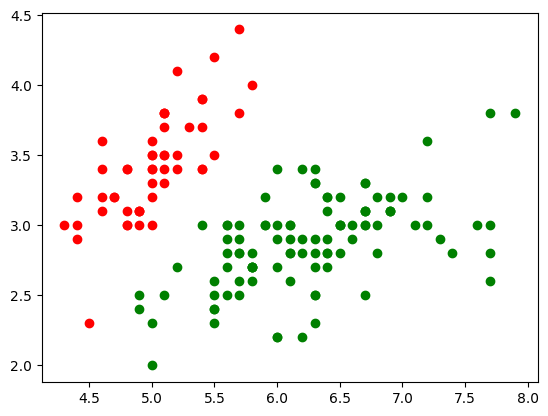

x_train[0:10]
 [[-1.91021284 -0.03808548]
 [-0.44940217 -1.24078497]
 [-1.30154173  0.9240741 ]
 [-0.44940217 -1.48132486]
 [ 1.0114085   0.20245441]
 [ 0.52447161  0.68353421]
 [ 0.03753472  0.44299431]
 [-0.57113639  2.12677358]
 [-0.44940217  1.164614  ]
 [-0.44940217 -1.00024507]]
Epoch: 0, wCalc: [ 0.17502097 -0.35897787], bCalc: [0.18257432], logLoss: -207.79628276946434
Epoch: 1, wCalc: [ 0.17652097 -0.35787787], bCalc: [0.18257432], logLoss: -9.445285580430188
Epoch: 2, wCalc: [ 0.17302097 -0.35977787], bCalc: [0.18157432], logLoss: -14.167928370645283
Epoch: 3, wCalc: [ 0.17452097 -0.35867787], bCalc: [0.18157432], logLoss: -9.445285580430188
Epoch: 4, wCalc: [ 0.17602097 -0.35757787], bCalc: [0.18157432], logLoss: -9.445285580430188
Epoch: 5, wCalc: [ 0.17752097 -0.35647787], bCalc: [0.18157432], logLoss: -9.445285580430188
Epoch: 6, wCalc: [ 0.17402097 -0.35837787], bCalc: [0.18057432], logLoss: -14.167928370645283
Epoch: 7, wCalc: [ 0.17552097 -0.35727787], bCalc: [0.180574

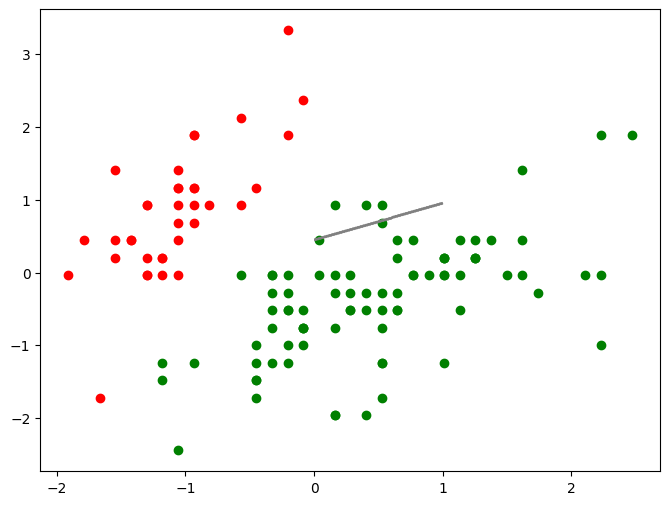

In [11]:
# read data from iris dataset (as numpy array)
from matplotlib import colors


data = read_data(DATA_PATH)

# select relevant data from data read
x = data[:, 0:2]
y = data[:, 4].astype(int)

print("Y: \n", y)

# Plot the original data

# plot points where y == 1 in green
plt.scatter(x[np.where(y == 1), 0], x[np.where(y == 1), 1], c="g")
# plot points where y == 0 in red
plt.scatter(x[np.where(y == 0), 0], x[np.where(y == 0), 1], c="r")
plt.show()

# split training and test data (random state: int -> reproducible)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Standardize input values (needs to be done separately for training and test data)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("x_train[0:10]\n", x_train[0:10])


# create model
model = Perceptron(x, lr=0.001)

# train perceptron
model.train(x, y, numEpochs=100)

# +++ visualize result +++
# show scatter, as above + line, as calculated with w, b

n = 100
# create meshgrid: every possible combination of x1, x2
meshgrid = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
count = 0
z = []

# calculate yCalc for every possible x1, x2 combination
for value in np.nditer(meshgrid):
    count += 1
    # calculate yCalc for this x,
    # yCalc = model.predict(np.array(value), model.w, model.b).item()
    yCalc = model.predict(np.array(value), model.w, model.b)
    z.append(yCalc)

    # if count % 10 == 0:
    print(value, yCalc)

# print ("len(z): ", len(z))
# npArrZ = np.array(z)
# print("npArrZ, shape: ", npArrZ.shape)

# plot line with calculated b and w
plt.figure(figsize=(8, 6))
plt.contour(
    meshgrid[0], meshgrid[1], np.array(z).reshape(n, n), colors="grey", alpha=0.5
)
# Plot standardized training data

# plot points where y == 1 in green
plt.scatter(
    x_train[np.where(y_train == 1), 0], x_train[np.where(y_train == 1), 1], c="g"
)
# plot points where y == 0 in red
plt.scatter(
    x_train[np.where(y_train == 0), 0], x_train[np.where(y_train == 0), 1], c="r"
)
plt.show()

# visualize error (over epochs)

# apply model to test data, visualize

# compare training- and test-data


In [10]:

#np.random.uniform?
#np.random.random?u
#plt.scatter?
#len(z)
#z[0]
#npArrZ
plt.contour?


Signature: plt.contour(*args, data=None, **kwargs) -> 'QuadContourSet'
Docstring:
Plot contour lines.

Call signature::

    contour([X, Y,] Z, [levels], **kwargs)

`.contour` and `.contourf` draw contour lines and filled contours,
respectively.  Except as noted, function signatures and return values
are the same for both versions.

Parameters
----------
X, Y : array-like, optional
    The coordinates of the values in *Z*.

    *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
    created via `numpy.meshgrid`), or they must both be 1-D such
    that ``len(X) == N`` is the number of columns in *Z* and
    ``len(Y) == M`` is the number of rows in *Z*.

    *X* and *Y* must both be ordered monotonically.

    If not given, they are assumed to be integer indices, i.e.
    ``X = range(N)``, ``Y = range(M)``.

Z : (M, N) array-like
    The height values over which the contour is drawn.  Color-mapping is
    controlled by *cmap*, *norm*, *vmin*, and *vmax*.

levels : int or array-l